<a href="https://colab.research.google.com/github/bolby0216/myrepository2/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 27kB/s 
     |████████████████████████████████| 368kB 46.2MB/s 
     |████████████████████████████████| 3.2MB 53.4MB/s 
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2


In [0]:
!apt-get --purge remove "*cublas*" "cuda*"
!reboot
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt install cuda-10-0
!reboot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'cuda-cublas-dev-10-0' for glob '*cublas*'
Note, selecting 'libcublas-dev' for glob '*cublas*'
Note, selecting 'cuda-cublas-cross-qnx-10-0' for glob '*cublas*'
Note, selecting 'libcublas10' for glob '*cublas*'
Note, selecting 'cuda-cublas-10-0' for glob '*cublas*'
Note, selecting 'libcublas9.1' for glob '*cublas*'
Package 'cuda-cublas-cross-qnx-10-0' is not installed, so not removed
Note, selecting 'cuda-cusparse-cross-qnx-10-0' for glob 'cuda*'
Note, selecting 'cuda-npp-cross-qnx-10-0' for glob 'cuda*'
Note, selecting 'cuda-nvprune-10-0' for glob 'cuda*'
Note, selecting 'cuda-nvprune-10-1' for glob 'cuda*'
Note, selecting 'cuda-nvprune-10-2' for glob 'cuda*'
Note, selecting 'cuda-nvgraph-10-0' for glob 'cuda*'
Note, selecting 'cuda-nvgraph-10-1' for glob 'cuda*'
Note, selecting 'cuda-nvgraph-10-2' for glob 'cuda*'
Note, selecting 'cuda-cublas-dev-10-0' for glob 'cuda*'
Note,

In [0]:
import tensorflow as tf
import numpy as np
from IPython.display import Image

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)

dddd = x_test

x_val  = x_train[50000:60000]
x_train = x_train[0:50000]
y_val  = y_train[50000:60000]
y_train = y_train[0:50000]

print("train data has " + str(x_train.shape[0]) + " samples")
print("every train data is " + str(x_train.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

print("validation data has " + str(x_val.shape[0]) + " samples")
print("every train data is " + str(x_val.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

print("test data has " + str(x_test.shape[0]) + " samples")
print("every test data is " + str(x_test.shape[1]) 
      + " * " + str(x_test.shape[2]) + " image")

x_train = x_train.reshape(50000, 784)
x_val = x_val.reshape(10000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)


x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_val /= gray_scale
x_test /= gray_scale

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

(60000, 28, 28)
(10000, 28, 28)
train data has 50000 samples
every train data is 28 * 28 image
validation data has 10000 samples
every train data is 28 * 28 image
test data has 10000 samples
every test data is 28 * 28 image
(50000, 784)
(10000, 784)


In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [0]:
def mlp(x):
    # hidden layer1
    w1 = tf.Variable(tf.random_uniform([784,256]))
    b1 = tf.Variable(tf.zeros([256]))
    h1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    # hidden layer2
    w2 = tf.Variable(tf.random_uniform([256,128]))
    b2 = tf.Variable(tf.zeros([128]))
    h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)
    # output layer
    w3 = tf.Variable(tf.random_uniform([128,10]))
    b3 = tf.Variable(tf.zeros([10]))
    logits= tf.matmul(h2, w3) + b3
    
    return logits

In [0]:

logits = mlp(x)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=y))

In [0]:
train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss_op)

epoch: 0, validation accuracy: 0.099, loss: 8802.505520019533
epoch: 1, validation accuracy: 0.8196, loss: 284.1685752105712
epoch: 2, validation accuracy: 0.8714, loss: 14.14816474914551
epoch: 3, validation accuracy: 0.8927, loss: 9.154122104644774
epoch: 4, validation accuracy: 0.8992, loss: 7.078823680877686
epoch: 5, validation accuracy: 0.9017, loss: 5.930464911460875
epoch: 6, validation accuracy: 0.9002, loss: 4.904062485694888
epoch: 7, validation accuracy: 0.895, loss: 4.413990807533265
epoch: 8, validation accuracy: 0.8981, loss: 4.6106773519516
epoch: 9, validation accuracy: 0.8962, loss: 4.3759166431427
epoch: 10, validation accuracy: 0.9027, loss: 3.8812006473541274
epoch: 11, validation accuracy: 0.8804, loss: 4.292806181907654
epoch: 12, validation accuracy: 0.8862, loss: 4.531862931251527
epoch: 13, validation accuracy: 0.9018, loss: 4.3614066314697295
epoch: 14, validation accuracy: 0.8911, loss: 3.6560275864601137
epoch: 15, validation accuracy: 0.8447, loss: 3.90764

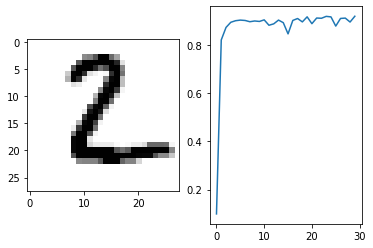

In [43]:
import matplotlib.pyplot as plt


# initialize
init = tf.global_variables_initializer()

# train hyperparameters
epoch_cnt = 30
batch_size = 1000
iteration = len(x_train) // batch_size
graph_x = list(range(30))
graph_y = []

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    for epoch in range(epoch_cnt):
        avg_loss = 0.
        start = 0; end = batch_size
        
        for i in range(iteration):
            _, loss = sess.run([train_op, loss_op], 
                               feed_dict={x: x_train[start: end], y: y_train[start: end]})
            start += batch_size; end += batch_size
            # Compute average loss
            avg_loss += loss / iteration
            
        # Validate model
        preds = tf.nn.softmax(logits)  # Apply softmax to logits
        correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        cur_val_acc = accuracy.eval({x: x_val, y: y_val})
        graph_y.append(cur_val_acc)
        print("epoch: "+str(epoch)+", validation accuracy: " 
              + str(cur_val_acc) +', loss: '+str(avg_loss))
    
    # Test model
    preds = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("[Test Accuracy] :", accuracy.eval({x: x_test, y: y_test}))

    keep_prob = tf.placeholder(tf.float32)
    prediction=tf.argmax(preds,1)
    predint = prediction.eval(feed_dict={x: [x_test[1]],keep_prob: 1.0}, session=sess)
    print(predint[0])

    plt.subplot(1, 2, 1)
    plt.imshow(dddd[1], cmap=plt.cm.binary)

    plt.subplot(1, 2, 2)
    plt.plot(graph_x, graph_y)
    plt.show()


In [32]:
import tensorflow
print(tensorflow.__version__)

1.13.1
